In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as pyp
import csv
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

1.05150401391
0.0240384615385 8316


(1, 1000)

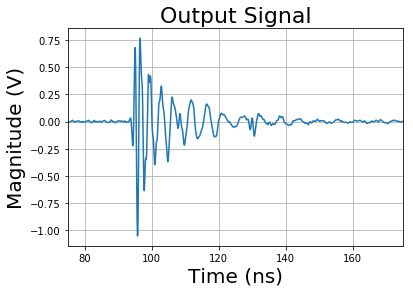

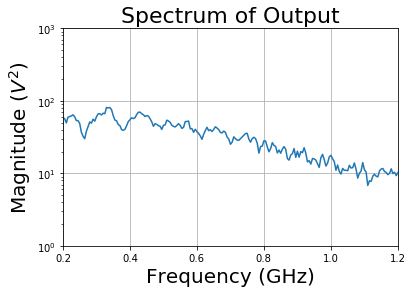

In [2]:

SurfTime=[]

SurfAmp=[]

f = open('Surf_Atten.csv')

Surf = csv.reader(f)

for row in Surf:
    SurfTime.append(float(row[0]))
    SurfAmp.append(float(row[1]))

f.close()


plt.grid(True)
plt.plot(SurfTime,SurfAmp)
plt.title('Output Signal',fontsize=22)
plt.xlabel('Time (ns)',fontsize=20)
plt.ylabel('Magnitude (V)',fontsize=20)

print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

plt.xlim(75,175)


plt.figure(2)
N = len(SurfTime)
dt = SurfTime[1]-SurfTime[0]
print(dt, N)


fft_Surf = fft.fft(SurfAmp)
fft_Surf_shift = fft.fftshift(fft_Surf)

freq_Surf = fft.fftfreq(N, dt)

SURF_FFT = fft_Surf_shift

plt.semilogy(fft.fftshift(freq_Surf), abs(SURF_FFT))

#plt.axis([0, 2.5*10**(10),10*10**(-8),10e7])
plt.grid(True)
plt.title('Spectrum of Output',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)
plt.xlim([0.2,1.2])
plt.ylim(1,1000)

0.0021351320408
2.40384615385e-11 8316


(0.0001, 1)

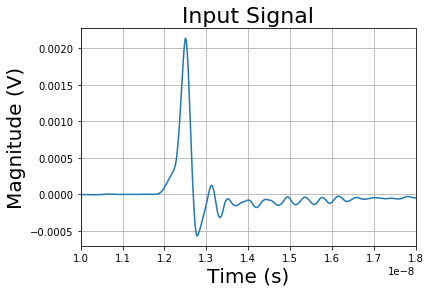

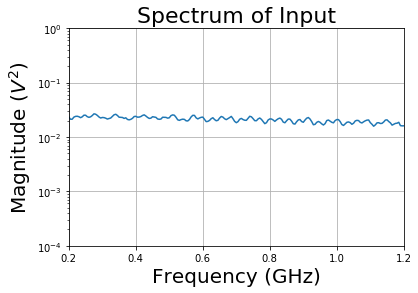

In [3]:
AmpaAmp=[]
AmpaTime=[]

f = open('Ampa_Atten.csv')

Ampa = csv.reader(f)

for row in Ampa:
    AmpaTime.append(float(row[0])*10**(-9))
    AmpaAmp.append(float(row[1]))

f.close()
plt.grid(True)
plt.plot(AmpaTime,AmpaAmp)
plt.title('Input Signal',fontsize=22)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('Magnitude (V)',fontsize=20)
plt.xlim(1e-8,.18e-7)
print(np.sqrt(max(np.array(AmpaAmp)*np.array(AmpaAmp))))





plt.figure(2)
N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]
print(dt, N)


fft_Ampa = fft.fft(AmpaAmp)
fft_Ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.fftfreq(N, dt)

Ampa_FFT = fft_Ampa_shift


FreqDom=fft.fftshift(freq_Ampa)/10**9

plt.semilogy(FreqDom, abs(Ampa_FFT))

#plt.axis([0, 2.5*10**(10),10*10**(-8),10e7])
plt.grid(True)
plt.title('Spectrum of Input',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)
plt.xlim([0.2,1.2])
plt.ylim(10**(-4),1)

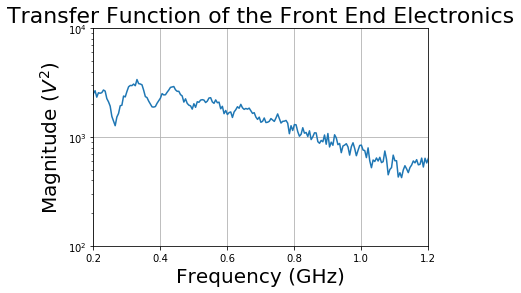

In [4]:
elec_Transfer = SURF_FFT/Ampa_FFT




plt.semilogy(fft.fftshift(freq_Ampa)*10**(-9), abs(elec_Transfer))

#plt.axis([0, 1.2*10**(9),0,10**(5)])

plt.title('Transfer Function of the Front End Electronics',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)


plt.grid(True)

plt.xlim(0.2,1.2);
plt.ylim(10**(2),10**4);

[ -3.26528007e-02   2.89783853e+01  -6.24947866e-03  -2.84941375e+00
  -1.83624321e-02   9.07518195e+00  -2.91312713e+02   6.66239295e-02
   1.91778079e+02  -4.83670527e-02  -5.02061099e+01   1.70316576e-02
  -3.32930339e+01   7.54869528e-02   3.27235375e+01  -1.20135556e-03
   6.43916070e+00  -7.28613117e-03  -6.98224104e+00   8.43982073e-03
  -1.62313293e+01   9.40858344e-02   3.18858055e+01  -6.98466876e-02]


(300, 325)

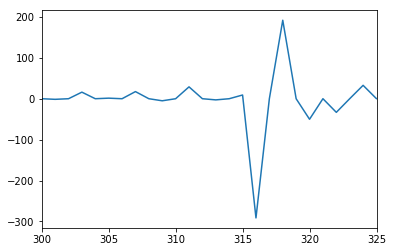

In [5]:
elec_Transfer = SURF_FFT/Ampa_FFT


f=fft.ifftshift(elec_Transfer)
yi=fft.irfft(f)



#yi=np.concatenate((yi[8000:8316]),(yi[0,1000]))
yi=np.concatenate((yi[8000:8316],(yi[0:1000])))


#t=np.linspace(310,325,100)
#g=interp1d(yi[200:400])

plt.plot(yi)
print(yi[310:334]);
t=np.linspace(1,24)

#g=interp1d(t,yi[310:334])

#plt.semilogy(fft.fftshift(freq_Ampa)*10**(-9), abs(elec_Transfer))

#plt.title('Transfer Function of the Front End Electronics',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)


#plt.grid(True)
plt.xlim(300,325)
#plt.xlim(650,1050)
#plt.ylim(10**(2),10**4);

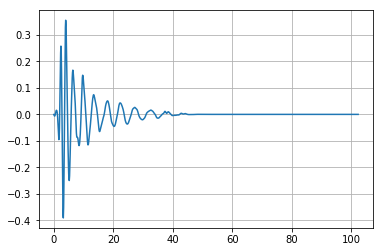

In [6]:
A=np.loadtxt('tf14TV.txt')

time=A[:,0];
amp=A[:,1];


#parseval_sx = np.sum(amp**2*dt)

#print(parseval_sx)

plt.plot(time,amp)
plt.grid(True)

0.264921422997


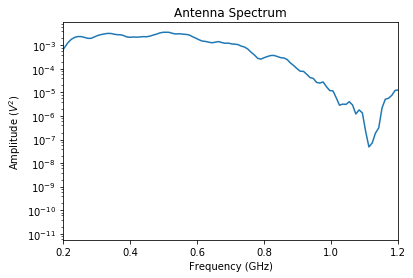

In [7]:
N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

plt.semilogy(fft.fftshift(freq), abs(fshift*fshift)/N*dt)
plt.xlim(0.2,1.2)

parseval_fx = np.sum(np.abs(fshift)**2/N*dt)
print(parseval_fx)


plt.title('Antenna Spectrum')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude ($V^2$)')

/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


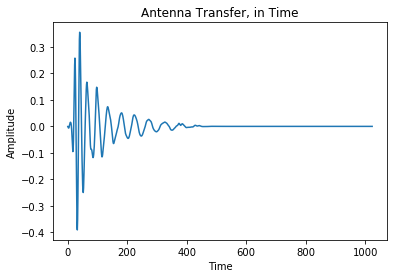

In [8]:
N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

f=fft.ifftshift(fshift)
yi=fft.ifft(f)

plt.plot(yi)

#plt.semilogy(fft.fftshift(freq), abs(fshift*fshift)/N*dt)
#plt.xlim(0.2,1.2)




plt.title('Antenna Transfer, in Time')
plt.xlabel('Time')
plt.ylabel('Amplitude')

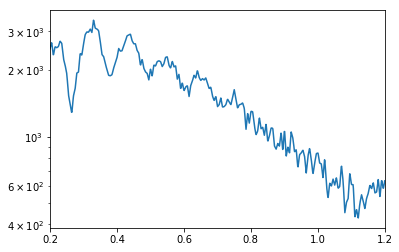

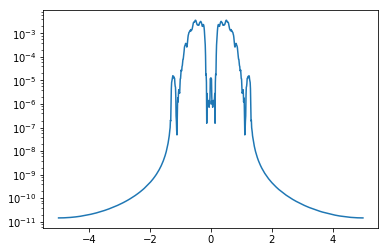

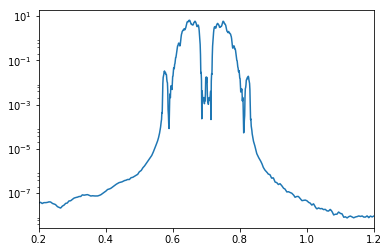

In [9]:
#Transfer Function of the electronics and antenna combined


elec_Transfer = SURF_FFT/Ampa_FFT




#plt.semilogy(fft.fftshift(freq_Ampa)*10**(-9), abs(elec_Transfer))


g = interp1d(fft.fftshift(freq_Ampa)*10**(-9), abs(elec_Transfer))

fnew=np.linspace(.200,1.200,1024)
    
plt.semilogy(fnew,g(fnew))
plt.xlim(0.2,1.2)

#print(len(fft.fftshift(freq_Ampa)*10**(-9)))
#print(len(fft.fftshift(freq)))


N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

plt.figure(2)
plt.semilogy(fft.fftshift(freq), abs(fshift*fshift)/N*dt)
#plt.xlim(0.2,1.2);


plt.figure(3)
plt.xlim(0.2,1.2)
plt.semilogy(fnew,abs(fshift*fshift)/N*dt*g(fnew))

[-5.         -4.99023438 -4.98046875 ...,  4.97070312  4.98046875
  4.99023438]


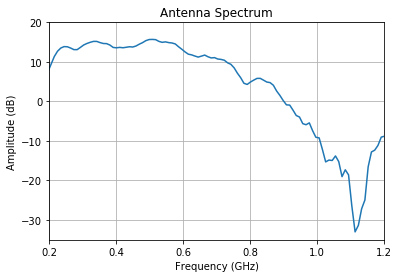

In [10]:
N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))

plt.plot(fft.fftshift(freq), dB)
plt.xlim(0,1.2)

#print(fft.fftshift(freq).tolist().index(0.205078125))
#for i in range(len(fft.fftshift(freq))):
 #   print(fft.fftshift(freq)[i])

plt.title('Antenna Spectrum')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude (dB)')
plt.xlim(0.2,1.2)
plt.ylim(-35,20)
plt.grid(True)
print(fft.fftshift(freq))

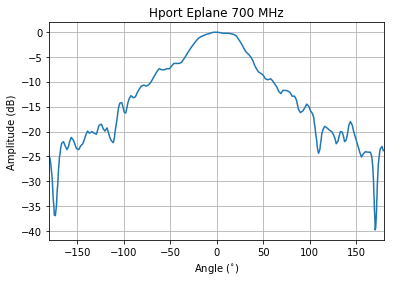

In [11]:
B=np.loadtxt('HportEplane_700MHz.txt',delimiter=',')

Gain_time=B[:,0];
Gain_amp=B[:,1];

plt.plot(Gain_time,Gain_amp)
plt.title('Hport Eplane 700 MHz')
plt.xlabel('Angle ($^{\circ}$)')
plt.xlim(-180,180)
plt.grid(True)
plt.ylabel('Amplitude (dB)')

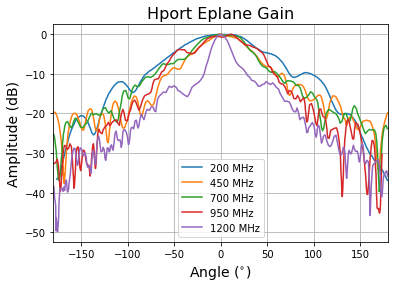

In [12]:
names=['HportEplane_200MHz.txt','HportEplane_450MHz.txt','HportEplane_700MHz.txt','HportEplane_950MHz.txt','HportEplane_1200MHz.txt']
labels=['200 MHz','450 MHz','700 MHz','950 MHz','1200 MHz',]
for i in range(len(names)):
    
    B=np.loadtxt(names[i],delimiter=',')

    Gain_time=B[:,0];
    Gain_amp=B[:,1];


    plt.plot(Gain_time,Gain_amp,label=labels[i])
    plt.title('Hport Eplane Gain',fontsize=16)
    plt.xlabel('Angle ($^{\circ}$)',fontsize=14)
    plt.xlim(-180,180)
    plt.legend(loc='best')
    plt.grid(True)
    plt.ylabel('Amplitude (dB)',fontsize=14)

In [13]:
A=[200,450,700,950,1200]

angle_minus_90=[-13.5115,-16.4122,-13.2415,-18.3263,-22.7273
]
angle_minus_80=[-10,-17.0229,-10.911,-15.2542,-19.556
]
angle_minus_70=[-8.01527,-15.7252,-10.0636,-11.3347,-19.556
]
angle_minus_60=[-6.41221,-10.458,-7.62712,-8.26271,-14.6934
]

angle_minus_50=[-4.50382,-8.47328,-7.41525,-4.76695,-13.0021
]
angle_minus_40=[-2.90076,-7.48092,-6.35593,-3.91949,-15.0106
]
angle_minus_30=[-1.67939,-4.80916,-3.60169,-4.87288,-13.4249
]
angle_minus_20=[-0.763359,-2.74809,-1.27119,-2.33051,-10.6765
]
angle_minus_10=[-0.152672,-1.0687,-0.529661,-0.635593,-4.01691
]
angle_0=[0,0,-0.105932,-0.635593,-0.105708
]
angle_10=[-0.0763359,-0.610687,-0.317797,1.77636E-15,-3.17125
]
angle_20=[-0.534351,-1.37405,-0.847458,-1.69492,-8.03383
]
angle_30=[-1.98473,-3.58779,-3.49576,-2.75424,-10.4651
]
angle_40=[-3.66412,-6.03053,-6.67373,-3.70763,-13.1078
]
angle_50=[-4.73282,-8.16794,-8.79237,-7.09746,-12.3679
]
angle_60=[-5.64885,-10.6107,-9.85169,-10.3814,-13.4249
]
angle_70=[-8.32061,-11.374,-12.3941,-14.1949,-16.9133
]
angle_80=[-10.7634,-12.8244,-12.1822,-16.3136,-19.556
]
angle_90=[-9.69466,-13.5878,-16.2076,-16.9492,-21.7759
]

#plt.plot(A,angle_minus_70,'.')
   
g = interp1d(A, angle_minus_70)

fnew=np.linspace(200,1200,50)
    
#plt.plot(fnew,g(fnew))
#plt.title('-80')
    


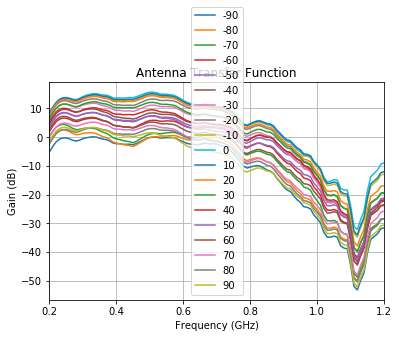

In [14]:
#N=len(time);
#dt=time[1]-time[0]

#f = fft.fft(amp)
#fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)


f=[.200,.450,.700,.950,1.200]
#A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
#name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']


for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)

    plt.plot(fnew,Hloss,label=name[i])
    
    
    
    plt.title('Antenna Transfer Function')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')
    plt.xlim(0.2,1.2)
    plt.legend(loc='best')
    plt.grid(True)
#plt.figure(2)
#plt.plot(fnew,dB[533:634])


#print(fnew)
#print(len(fnew))

#print(fft.fftshift(freq)[533:634])
#print(len(fft.fftshift(freq)[533:634]))




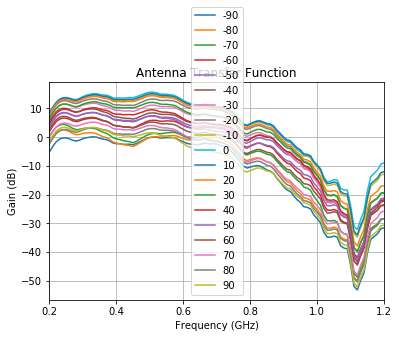

In [15]:
#N=len(time);
#dt=time[1]-time[0]

#f = fft.fft(amp)
#fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)


f=[.200,.450,.700,.950,1.200]
#A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
#name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']


for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)

    plt.plot(fnew,Hloss,label=name[i])
    
    
    
    plt.title('Antenna Transfer Function')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')
    plt.xlim(0.2,1.2)
    plt.legend(loc='best')
    plt.grid(True)
#plt.figure(2)
#plt.plot(fnew,dB[533:634])


#print(fnew)
#print(len(fnew))

#print(fft.fftshift(freq)[533:634])
#print(len(fft.fftshift(freq)[533:634]))




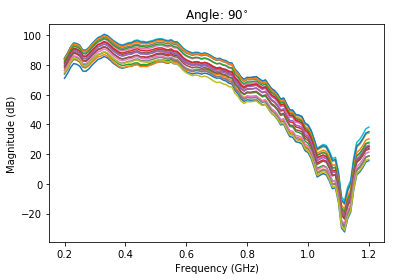

In [16]:
#Ant=np.loadtxt('AntennaTransfer.txt') 
ant_freq=fft.fftshift(freq_Ampa)*10**(-9) 
ant_amp=20*np.log10(abs(elec_Transfer))
#plt.semilogy(fft.fftshift(freq_Ampa)*10**(-9), abs(ant_Transfer))


elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=20*np.log10(abs(fshift*fshift))




ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)


f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])

    plt.plot(fnew,Final_Transfer)
    

    
    plt.title('Angle: '+name[i]+'$^{\circ}$')
    plt.ylabel('Magnitude (dB)')
    plt.xlabel('Frequency (GHz)')





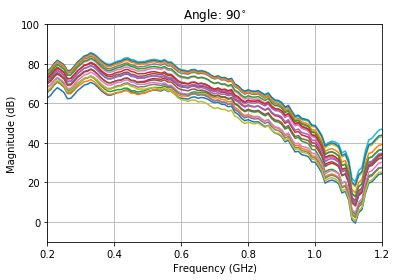

In [17]:
Ant=np.loadtxt('AntennaTransfer.txt') 
ant_freq=Ant[:,0] 
ant_amp=Ant[:,1]



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)




f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])

    plt.plot(fnew,Final_Transfer)
    
    plt.grid(True)
    plt.ylim(-10,100) 
    plt.xlim(0.2,1.2)
    plt.title('Angle: '+name[i]+'$^{\circ}$')
    plt.ylabel('Magnitude (dB)')
    plt.xlabel('Frequency (GHz)')


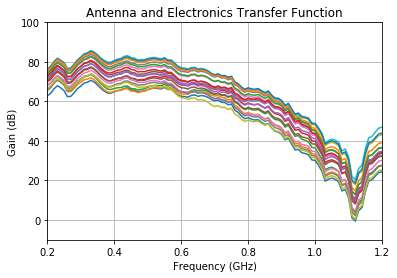

In [18]:
ant_freq=fft.fftshift(freq_Ampa)*10**(-9) 
ant_amp=20*np.log10(abs(elec_Transfer))



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)




f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']

for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])

    plt.plot(fnew,Final_Transfer)
    
    plt.grid(True)
    plt.ylim(-10,100) 
    plt.xlim(0.2,1.2)
    plt.title('Antenna and Electronics Transfer Function')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')


/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


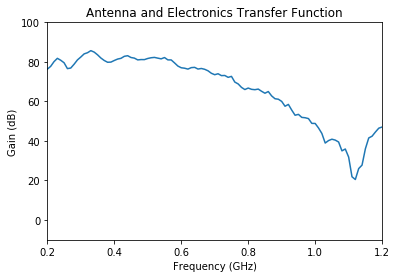

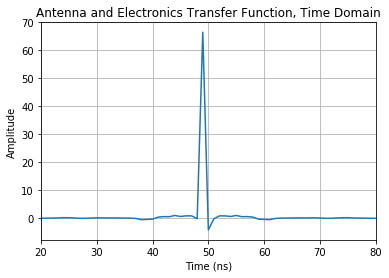

In [19]:
ant_freq=fft.fftshift(freq_Ampa)*10**(-9) 
ant_amp=20*np.log10(abs(elec_Transfer))



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)




f=[.200,.450,.700,.950,1.200]
A=[angle_0]
name=['-90','-60','-30','0','30','60','90']

for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])

    plt.plot(fnew,Final_Transfer)
    plt.ylim(-10,100) 
    plt.xlim(0.2,1.2)
    plt.title('Antenna and Electronics Transfer Function')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')
    
    yi=fft.ifft(Final_Transfer)
    
    yi=np.concatenate((yi[51:100],(yi[0:50])))
    plt.figure(2)
    plt.plot(yi)
    
    
    plt.grid(True)
    #plt.ylim(-10,100) 
    plt.xlim(20,80)
    plt.title('Antenna and Electronics Transfer Function, Time Domain')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (ns)')


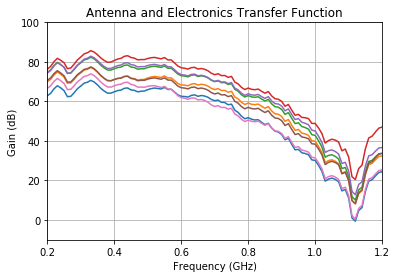

In [20]:
ant_freq=fft.fftshift(freq_Ampa)*10**(-9) 
ant_amp=20*np.log10(abs(elec_Transfer))



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)




f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90,angle_minus_60,angle_minus_30,angle_0,angle_30,angle_60,angle_90]
name=['-90','-60','-30','0','30','60','90']

for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])

    plt.plot(fnew,Final_Transfer)
    
    plt.grid(True)
    plt.ylim(-10,100) 
    plt.xlim(0.2,1.2)
    plt.title('Antenna and Electronics Transfer Function')
    plt.ylabel('Gain (dB)')
    plt.xlabel('Frequency (GHz)')


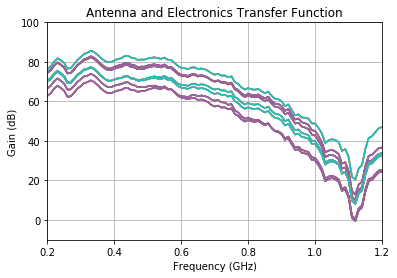

In [21]:
ant_freq=fft.fftshift(freq_Ampa)*10**(-9) 
ant_amp=20*np.log10(abs(elec_Transfer))



elec_func= interp1d(ant_freq,ant_amp)

fnew=np.linspace(.20,1.200,101)

elecdB=elec_func(fnew)

#plt.plot(fnew,elecdB)






freq = fft.fftfreq(N, dt)

dB=10*np.log10(abs(fshift*fshift))


ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

fnew=np.linspace(.20,1.200,101)

dB=ant_func(fnew)




f=[.200,.450,.700,.950,1.200]
A=[angle_minus_90,angle_minus_60,angle_minus_30,angle_0,angle_30,angle_60,angle_90]
name=['-90','-60','-30','0','30','60','90']

for i in range(len(A)):
    #plt.figure(i)
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,101)
    
    Hloss=dB+g(fnew)
    
    Final_Transfer=[]
    
    for j in range(len(Hloss)):
        Final_Transfer.append(Hloss[j]+elecdB[j])

    names=['/home/donald/shower_45.8_9.dat','/home/donald/shower_48.3_9.dat','/home/donald/shower_50.8_9.dat','/home/donald/shower_53.3_9.dat','/home/donald/shower_55.8_9.dat']
    title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

    for k in range(len(names)):
    
        cheren = np.loadtxt(names[k])
        
        domain=cheren[:,0]
        codomain=cheren[:,1]
    
        plt.plot(fnew,Final_Transfer)
    
        plt.grid(True)
        plt.ylim(-10,100) 
        plt.xlim(0.2,1.2)
        plt.title('Antenna and Electronics Transfer Function')
        plt.ylabel('Gain (dB)')
        plt.xlabel('Frequency (GHz)')


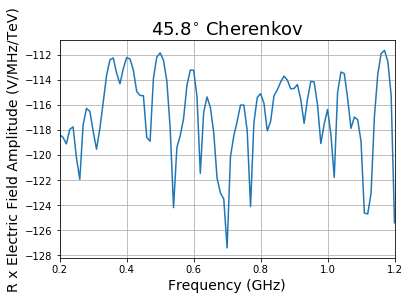

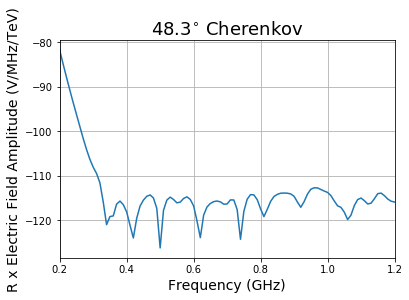

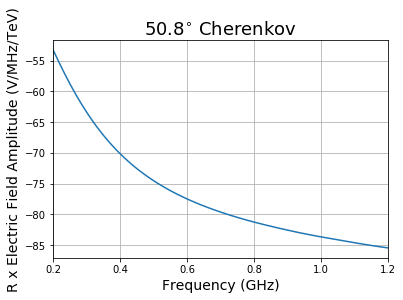

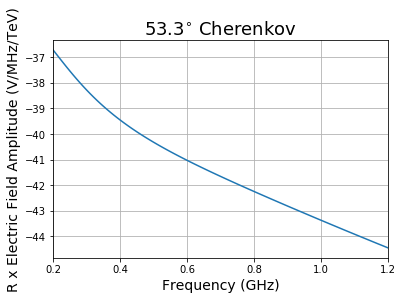

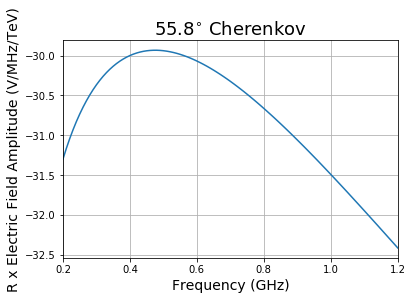

In [22]:
names=['/home/donald/shower_45.8_9.dat','/home/donald/shower_48.3_9.dat','/home/donald/shower_50.8_9.dat','/home/donald/shower_53.3_9.dat','/home/donald/shower_55.8_9.dat']
title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

for i in range(len(names)):
    A=np.loadtxt(names[i])

    x=A[:,0]
    
    #for i in range(len(x)):
     #   x[i]*=10**3
    y=A[:,1]

    #plt.plot(x,y)
    #plt.xlim(900)

    N=len(x)
    dt=x[1]-x[0]
    
    #dt=0.04
    #dt=0.00
    NFFT=100*N
    f = fft.fft(y, N)
    fshift = fft.fftshift(f)
#pyp.plot(abs(f*f))



    freq = fft.fftfreq(N, dt)
    df=freq[1]-freq[0]
    

    

    
    
    plt.figure(i)
    plt.title(title[i]+' Cherenkov',fontsize=18)
    gq = interp1d(fft.fftshift(freq)*3, 10*np.log10(10**(-4)*1000*abs(fshift)*dt*1e3/(N)))
    fnewq=np.linspace(.200,1.200,101)
    
    
    #angles=['/home/donald/minus90.txt','minus60.txt','minus30.txt','zero.txt','plus30.txt','plus60.txt','plus90.txt',]
    #name=['-90$^{\circ}$', '-60$^{\circ}$', '-30$^{\circ}$', '0$^{\circ}$', '30$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$']


    #fnew=np.linspace(.200,1.200,101)



    #for j in range(len(angles)):
        
    #   title=['45.8$^{\circ}$','48.3$^{\circ}$','50.8$^{\circ}$','53.3$^{\circ}$','55.8$^{\circ}$']

    
    #    A=np.loadtxt(angles[j],delimiter=',',unpack=True)
    
       
        

    
    plt.plot(fnewq,gq(fnewq),label=name[i])
    #plt.legend(loc='best')
    plt.grid(True)
    #plt.ylim(0,80) 
    plt.xlim(0.2,1.2)
        
        #plt.title('Total Transfer Function', fontsize=18)
    plt.ylabel('Gain (dB)', fontsize=16)
    plt.xlabel('Frequency (GHz)', fontsize=16)
    #plt.legend(loc='right',bbox_to_anchor=(1.35,0.45),title='Boresight Angle',fontsize=14)

    
    

    
    
    
  
    plt.xlim(.2,1.2)
    #plt.ylim(-120,-20)
    plt.xlabel('Frequency (GHz)',fontsize=14)
    plt.ylabel('R x Electric Field Amplitude (V/MHz/TeV)',fontsize=14)
   
    #plt.title('1 EeV',fontsize=16)
    plt.grid(True, which='both')
